<a href="https://colab.research.google.com/github/irenetsk/mastersthesis/blob/main/0_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Neighbours Classification
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier

In [63]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/
! pip install umap-learn
! pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


## KNN with all 4 classes (**Fine-grained** Classification)

### Training Set Creation
1 = Enthusiastic / 2 = Neutral / 3 = Sad / 4 = Angry


In [17]:
# READSPEAKER SENTENCES
angrysents = []
with open("./thesis/readspeaker_annots/emotion_02_anger.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    angrysents.append(sent)
angrylabels = [4 for i in range(len(angrysents))]

enthusents = []
with open("./thesis/readspeaker_annots/emotion_03_happy.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    enthusents.append(sent)
enthulabels = [1 for i in range(len(enthusents))]

sadsents = []
with open("./thesis/readspeaker_annots/emotion_04_sadness.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    sadsents.append(sent)
sadlabels = [3 for i in range(len(sadsents))]

# MY ANNOTATIONS
trainsents = []
with open("./thesis/myannotations/sents.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    trainsents.append(sent)

trainlabels = []
with open("./thesis/myannotations/labels.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for label in f:
    trainlabels.append(label)

with open("./thesis/myannotations/moreneutral_sents.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    trainsents.append(sent)
  for i in range(len(f)):
    trainlabels.append('2')

# rs_sents = angrysents + enthusents + sadsents
# rs_labels = angrylabels + enthulabels + sadlabels
comb_sents = trainsents + angrysents + enthusents + sadsents
comb_labels = trainlabels + angrylabels + enthulabels + sadlabels

In [18]:
# print(f'enthusiastic: \t{len(enthusents)} \nsad: \t\t{len(sadsents)}\nangry: \t\t{len(angrysents)}\nmy annotations: {len(trainsents)}\ntotal: \t\t{sum([len(angrysents), len(enthusents), len(sadsents), len(trainsents)])}')

In [64]:
# trainsentsind = dict()
allsentences = list()

# with open("thesis/corpora/eng-simple_wikipedia_2021_10K-sentences.txt", encoding='utf-8') as f1:
#   f1 = (f1.read()).split("\n")
#   with open("thesis/corpora/eng-uk_web-public_2018_10K-sentences.txt", encoding='utf-8') as f2:
#     f2 = (f2.read()).split("\n")
#     for i, line in enumerate(f1+f2):
#         sent = (line[(len(str(i+1))):]).strip()             #removes the line number and the tab char
#         if sent in trainsents:
#           trainsentsind[sent] = i
#         allsentences.append(sent)

# track = len(allsentences)
for i, sent in enumerate(comb_sents):
  allsentences.append(sent)
  # trainsentsind[sent] = track + i

embeddings = model.encode(allsentences)
# embeddings = model.encode(allsentences)

In [ ]:
# len(allsentences)

In [117]:
X_train = np.array([embeddings[i] for i, sent in enumerate(comb_sents)])
X_train_resh = np.array([(embeddings[i]).reshape(1, -1) for i, sent in enumerate(comb_sents)])
y_train = [int(element) for element in comb_labels]

In [ ]:
# from collections import Counter
# a = dict(Counter(alltrainlabels))
# a

### Dataset Split

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, train_size=0.65)
# X_train_resh, X_test, y_train, y_test = train_test_split(X_train_resh, y_train, random_state=42, train_size=0.65)

### Grid search & Run

In [135]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'weights': ('uniform', 'distance'), 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
# neigh = KNeighborsClassifier(metric=cosine)
# clf = GridSearchCV(neigh, parameters)
# clf.fit(X_train, y_train)
# sorted(clf.cv_results_.keys())

# print("Best parameters set found on development set:")
# print(clf.best_params_)

# print("Grid scores on development set:")
# means = clf.cv_results_["mean_test_score"]
# stds = clf.cv_results_["std_test_score"]
# for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# print("Detailed classification report:")
# y_true, y_pred = y_test, clf.predict(X_test)
# print(classification_report(y_true, y_pred))

In [ ]:
# import numpy as np
# import random
# best_hyperparameters = None
# grid = {'weights': ['uniform', 'distance'],
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
# print("Weights:\tAlgorithm:\tTraining set accuracy:")
# for i in range(20):
#   wt = grid['weights'][random.randint(0,1)]
#   al = grid['algorithm'][random.randint(0,3)]
#   model = KNeighborsClassifier(weights = wt, algorithm = al)
#   model.fit(X_train, y_train)
#   training_accuracy = model.score(X_test, y_test)
#   if best_hyperparameters is None or best_hyperparameters[2] < training_accuracy:
#     best_hyperparameters = (wt, al, training_accuracy)
#   print(f"{wt}\t\t{al}\t\t{training_accuracy}")
# best_weights = best_hyperparameters[0]
# best_algorithm = best_hyperparameters[1]
# print(f"Best parameters:{best_weights}\t{best_algorithm}")

**sklearn.metrics.pairwise.cosine_similarity** is designed to compare pairwise distance/similarity of the samples in the given input 2-D arrays

**scipy.spatial.distance.cosine** is designed to compute cosine distance of two 1-D arrays.

In [136]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(weights='distance', algorithm='auto', metric = cosine)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.score(X_test, y_test))

0.6627118644067796


Score: 0.6627118644067796


### ADD UMAP HERE FOR VISUALIZATION

In [142]:
! pip install --upgrade tbb
import umap
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(X_test)

### Plot

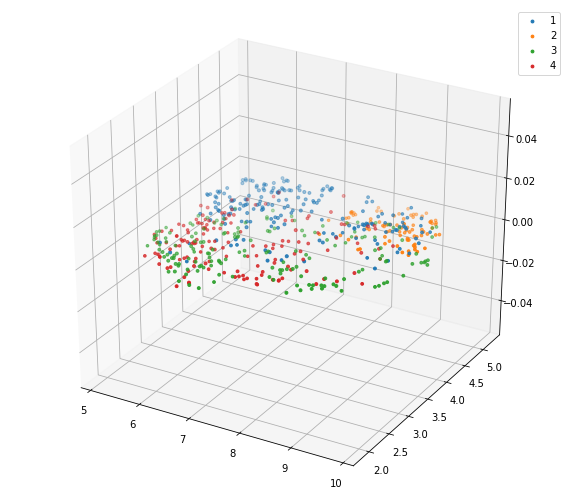

In [143]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

u_labels = np.unique(y_pred)
fig = plt.figure(figsize=(10,9))
ax = plt.axes(projection='3d')

for i in u_labels:
    plt.scatter(embedding[y_pred == i , 0], embedding[y_pred == i , 1], embedding[y_pred == i , 2],  label = i)
    # plt.scatter(X_test[y_pred == i , 0], X_test[y_pred == i , 1], X_test[y_pred == i , 2],  label = i)
plt.legend()
plt.show()

#Other

## Training/testing with only 3 classes (RS data)
Score: **0.634011090573013**

In [ ]:
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
angrysents = []
with open("./thesis/readspeaker_annots/emotion_02_anger.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:    #[:-478]:
    angrysents.append(sent)
angrylabels = [4 for i in range(len(angrysents))]

enthusents = []
with open("./thesis/readspeaker_annots/emotion_03_happy.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f[:-50]:
    enthusents.append(sent)
enthulabels = [1 for i in range(len(enthusents))]

sadsents = []
with open("./thesis/readspeaker_annots/emotion_04_sadness.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f[:-38]:
    sadsents.append(sent)
sadlabels = [3 for i in range(len(sadsents))]

X = angrysents + enthusents + sadsents
y = angrylabels + enthulabels + sadlabels

embeddings = model.encode(X)
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(embeddings)

X_train = np.array([embedding[i] for i, sent in enumerate(X)])
y_train = y

In [ ]:
# vec2sent = dict()
# for i, sentence in enumerate(X):
#   vec2sent[str(embedding[i])] = sentence

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, train_size=0.7)
neigh = KNeighborsClassifier(weights='distance', algorithm='auto')      # weights='distance', algorithm='auto'
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.score(X_test, y_test))

## Training/testing with 3 classes positive-neutral-negative (RS data+neutralsents)
Score: **0.8062730627306273**

In [ ]:
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

enthusents = []
with open("./thesis/readspeaker_annots/emotion_03_happy.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f[:-50]:
    enthusents.append(sent)
enthulabels = [0 for i in range(len(enthusents))]

sadsents = []
with open("./thesis/readspeaker_annots/emotion_04_sadness.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f[:-38]:
    sadsents.append(sent)
sadlabels = [2 for i in range(len(sadsents))]

neutralsents = []
with open("./thesis/myannotations/moreneutral_sents.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    neutralsents.append(sent)
neutrallabels = [1 for i in range(len(neutralsents))]

X = enthusents + neutralsents + sadsents
y = enthulabels + neutrallabels + sadlabels

embeddings = model.encode(X)
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(embeddings)

X_train = np.array([embedding[i] for i, sent in enumerate(X)])
y_train = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, train_size=0.7)
neigh = KNeighborsClassifier(weights='distance', algorithm='auto')      # weights='distance', algorithm='auto'
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.score(X_test, y_test))

## Train/test with 2 classes (**binary** classification)
Score: **0.847457627118644**

In [ ]:
enthusents = []
with open("./thesis/readspeaker_annots/emotion_03_happy.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f[:-50]:
    enthusents.append(sent)
enthulabels = [1 for i in range(len(enthusents))]

sadsents = []
with open("./thesis/readspeaker_annots/emotion_04_sadness.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f[:-38]:
    sadsents.append(sent)
sadlabels = [3 for i in range(len(sadsents))]

X = enthusents + sadsents
y = enthulabels + sadlabels

embeddings = model.encode(X)
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(embeddings)

X_train = np.array([embedding[i] for i, sent in enumerate(X)])
y_train = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, train_size=0.7)
neigh = KNeighborsClassifier(weights='distance', algorithm='auto')      # weights='distance', algorithm='auto'
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.score(X_test, y_test))

## Train/test with 2 classes (comb happy+neut & ang+sad)
Score: **0.8047091412742382**

In [ ]:
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
angrysents = []
with open("./thesis/readspeaker_annots/emotion_02_anger.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:    #[:-478]:
    angrysents.append(sent)
angrylabels = [2 for i in range(len(angrysents))]

enthusents = []
with open("./thesis/readspeaker_annots/emotion_03_happy.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f[:-50]:
    enthusents.append(sent)
enthulabels = [1 for i in range(len(enthusents))]

sadsents = []
with open("./thesis/readspeaker_annots/emotion_04_sadness.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f[:-38]:
    sadsents.append(sent)
sadlabels = [2 for i in range(len(sadsents))]

neutralsents = []
with open("./thesis/myannotations/moreneutral_sents.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    neutralsents.append(sent)
neutrallabels = [1 for i in range(len(neutralsents))]



X = enthusents + neutralsents + angrysents + sadsents
y = enthulabels + neutrallabels + sadlabels + angrylabels

embeddings = model.encode(X)
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(embeddings)

X_train = np.array([embedding[i] for i, sent in enumerate(X)])
y_train = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, train_size=0.7)
neigh = KNeighborsClassifier(weights='distance', algorithm='auto')      # weights='distance', algorithm='auto'
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.score(X_test, y_test))